In [112]:
import pandas as pd
import numpy as np

# Load train and test datasets
train_data = pd.read_csv('DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('DailyDelhiClimateTest.csv')

# Display the first few rows of each dataset
print("Train Data Head:")
print(train_data.head())

print("\nTest Data Head:")
print(test_data.head())


Train Data Head:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Test Data Head:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [113]:
# Check for missing values
print("Missing values in Train Data:\n", train_data.isnull().sum())
print("\nMissing values in Test Data:\n", test_data.isnull().sum())


Missing values in Train Data:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Missing values in Test Data:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


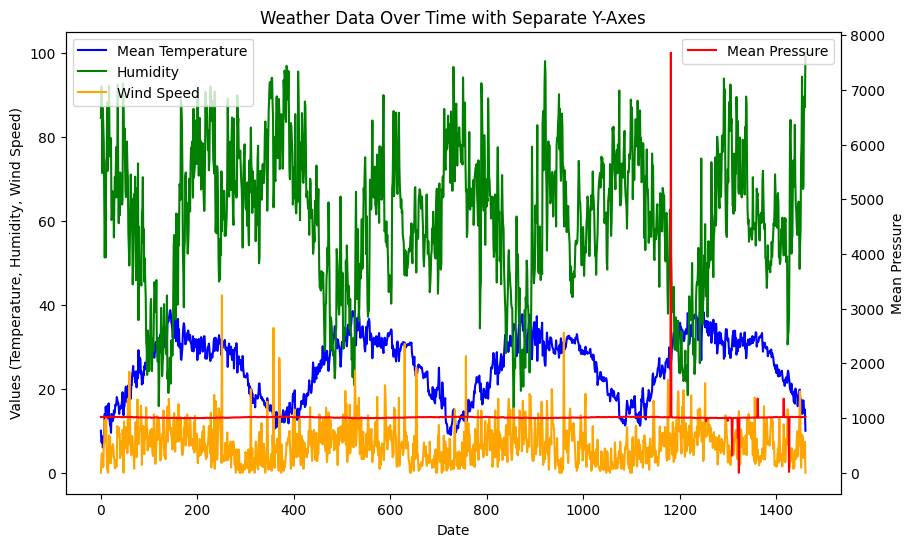

In [114]:
import matplotlib.pyplot as plt

# Create the figure and the first axis (for meantemp, humidity, wind_speed)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot meantemp, humidity, wind_speed on the first axis
ax1.plot(train_data.index, train_data['meantemp'], label='Mean Temperature', color='b')
ax1.plot(train_data.index, train_data['humidity'], label='Humidity', color='g')
ax1.plot(train_data.index, train_data['wind_speed'], label='Wind Speed', color='orange')

# Set labels and titles for ax1
ax1.set_xlabel('Date')
ax1.set_ylabel('Values (Temperature, Humidity, Wind Speed)')
ax1.legend(loc='upper left')

# Create a second y-axis (for meanpressure)
ax2 = ax1.twinx()

# Plot meanpressure on the second axis
ax2.plot(train_data.index, train_data['meanpressure'], label='Mean Pressure', color='r')
ax2.set_ylabel('Mean Pressure')
ax2.legend(loc='upper right')

# Title for the entire plot
plt.title('Weather Data Over Time with Separate Y-Axes')

# Show the plot
plt.show()


In [115]:
# Step 3: Identify Outliers
# For example, let's use a simple method to find outliers in meanpressure
meanpressure_mean = train_data['meanpressure'].mean()
meanpressure_std = train_data['meanpressure'].std()
threshold = 3 * meanpressure_std
outlier_condition = (train_data['meanpressure'] > (meanpressure_mean + threshold)) | (train_data['meanpressure'] < (meanpressure_mean - threshold))

In [116]:
# Step 4: Remove Outliers
print(f"Number of outliers detected in Mean Pressure: {outlier_condition.sum()}")
train_data = train_data[~outlier_condition]

Number of outliers detected in Mean Pressure: 4


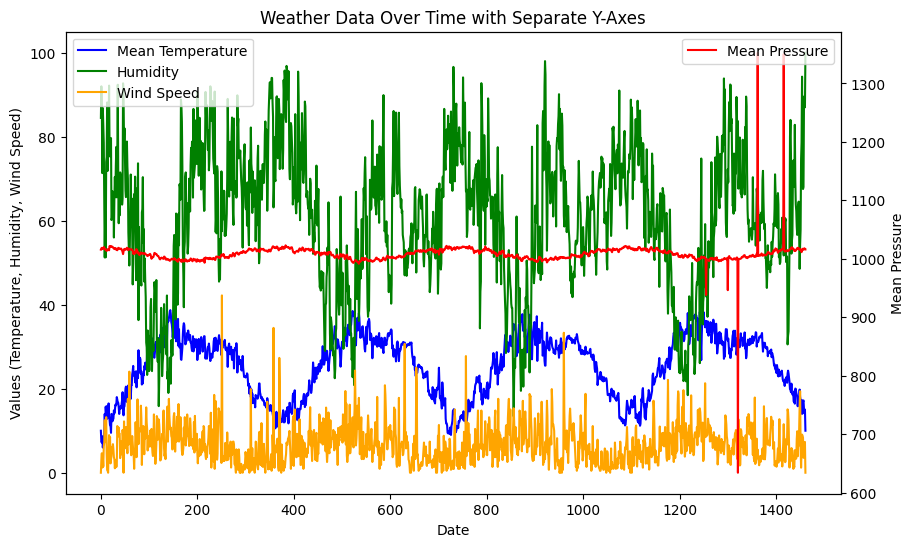

In [117]:
import matplotlib.pyplot as plt

# Create the figure and the first axis (for meantemp, humidity, wind_speed)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot meantemp, humidity, wind_speed on the first axis
ax1.plot(train_data.index, train_data['meantemp'], label='Mean Temperature', color='b')
ax1.plot(train_data.index, train_data['humidity'], label='Humidity', color='g')
ax1.plot(train_data.index, train_data['wind_speed'], label='Wind Speed', color='orange')

# Set labels and titles for ax1
ax1.set_xlabel('Date')
ax1.set_ylabel('Values (Temperature, Humidity, Wind Speed)')
ax1.legend(loc='upper left')

# Create a second y-axis (for meanpressure)
ax2 = ax1.twinx()

# Plot meanpressure on the second axis
ax2.plot(train_data.index, train_data['meanpressure'], label='Mean Pressure', color='r')
ax2.set_ylabel('Mean Pressure')
ax2.legend(loc='upper right')

# Title for the entire plot
plt.title('Weather Data Over Time with Separate Y-Axes')

# Show the plot
plt.show()


In [118]:
# Step 5: Check Data Types
print("\nData types of each column:")
train_data['date'] = pd.to_datetime(train_data['date'])
print(train_data.dtypes)

# Step 6: Standardize Formats (if needed)
# Example: Ensure that 'date' is the index
train_data.set_index('date', inplace=True)

# Final dataset after cleaning
print("\nCleaned Data Head:")
print(train_data.head())


Data types of each column:
date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

Cleaned Data Head:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [119]:
# Descriptive statistics
print("Descriptive Statistics:")
print(train_data.describe())


Descriptive Statistics:
          meantemp     humidity   wind_speed  meanpressure
count  1458.000000  1458.000000  1458.000000   1458.000000
mean     25.489741    60.781597     6.795648   1008.392369
std       7.354893    16.776821     4.562760     17.860527
min       6.000000    13.428571     0.000000    633.900000
25%      18.839286    50.375000     3.475000   1001.625000
50%      27.714286    62.625000     6.173810   1008.571429
75%      31.305804    72.250000     9.238235   1014.944901
max      38.714286   100.000000    42.220000   1352.615385


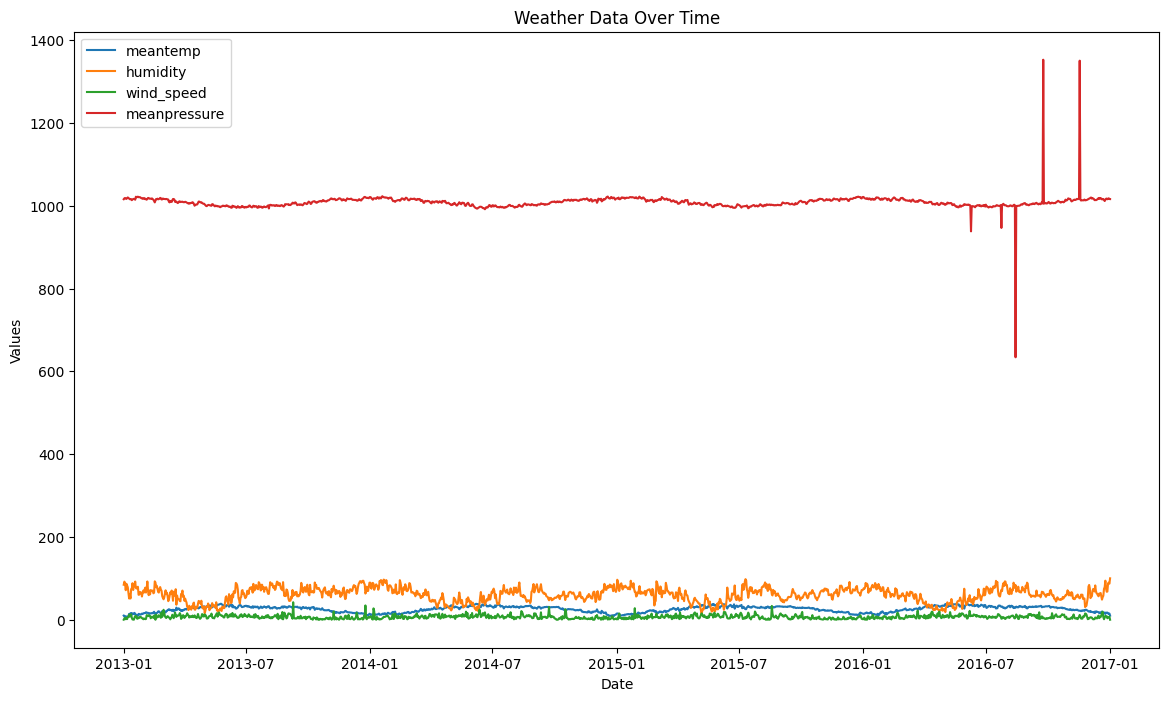

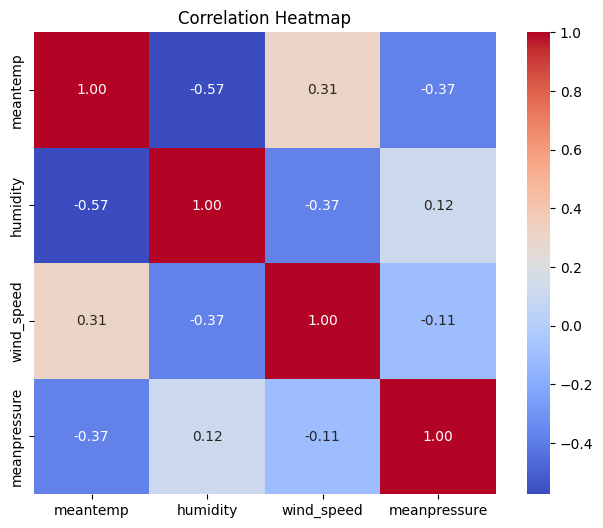

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plots for each feature
plt.figure(figsize=(14, 8))
for column in train_data.columns:
    plt.plot(train_data.index, train_data[column], label=column)
plt.title('Weather Data Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


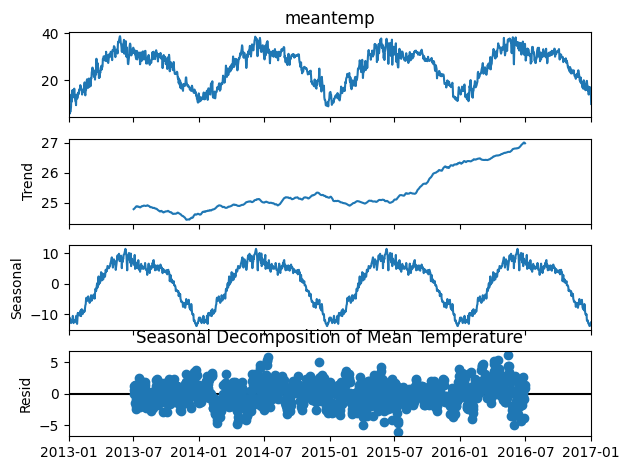

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the mean temperature time series
result = seasonal_decompose(train_data['meantemp'], model='additive', period=365)
result.plot()
plt.title('Seasonal Decomposition of Mean Temperature')
plt.show()


In [122]:
# Assuming 'test_data' is your test dataset
# 1. Data Cleaning
print(test_data.info())
print(test_data.isnull().sum())

# Handle missing values if necessary (e.g., fill or drop)

# 2. Descriptive Statistics
print(test_data.describe())

test_data['date'] = pd.to_datetime(test_data['date'])
print(test_data.dtypes)

# Step 6: Standardize Formats (if needed)
# Example: Ensure that 'date' is the index
test_data.set_index('date', inplace=True)

# Final dataset after cleaning
print("\nCleaned Data Head:")
print(test_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750  

In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Select features to standardize
features_to_standardize = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
train_data[features_to_standardize] = scaler.fit_transform(train_data[features_to_standardize])
test_data[features_to_standardize] = scaler.transform(test_data[features_to_standardize])

# Check the result
print(train_data[features_to_standardize].describe())
print(test_data[features_to_standardize].describe())


           meantemp      humidity    wind_speed  meanpressure
count  1.458000e+03  1.458000e+03  1.458000e+03  1.458000e+03
mean  -2.241767e-16  3.728156e-16 -2.582906e-16 -2.171103e-15
std    1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00
min   -2.650811e+00 -2.823495e+00 -1.489883e+00 -2.097479e+01
25%   -9.045322e-01 -6.205089e-01 -7.280216e-01 -3.790309e-01
50%    3.025616e-01  1.099157e-01 -1.363324e-01  1.002888e-02
75%    7.910460e-01  6.838208e-01  5.355147e-01  3.669982e-01
max    1.798678e+00  2.338456e+00  7.766463e+00  1.927945e+01
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    -0.513666   -0.269705    0.295597     -0.244045
std      0.865037    1.136963    0.786647      5.011352
min     -1.970758   -2.565824   -1.185687    -53.174137
25%     -1.231242   -1.261494   -0.270128     -0.053481
50%     -0.763664   -0.180763    0.279268      0.243466
75%      0.301347    0.663117    0.717597      0.4

In [124]:
import numpy as np
from sklearn.model_selection import train_test_split

def create_sequences(data, target_column, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])  # All columns except target
        y.append(data[i + time_steps, target_column])  # Target column
    return np.array(X), np.array(y)

# Specify the number of time steps to look back
time_steps = 5
# Prepare training data
X_train, y_train = create_sequences(train_data.values, target_column=0, time_steps=time_steps)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
# Prepare testing data (You may want to adjust this according to your requirements)
X_test, y_test = create_sequences(test_data.values, target_column=0, time_steps=time_steps)

Training set shape: (1162, 5, 3) (1162,)
Validation set shape: (291, 5, 3) (291,)


In [125]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define model parameters
time_steps = 5  # Number of time steps in each input sequence
n_features = X_train.shape[2]  # Number of features

# Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, n_features)))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 5, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50,  # You can adjust the number of epochs
                    batch_size=16,  # Batch size
                    validation_data=(X_val, y_val),  # Validation data
                    verbose=1)  # Verbosity mode


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3698 - val_loss: 0.0720
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0889 - val_loss: 0.0710
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0937 - val_loss: 0.0687
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0919 - val_loss: 0.0664
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0828 - val_loss: 0.0630
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0825 - val_loss: 0.0606
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0822 - val_loss: 0.0576
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - val_loss: 0.0550
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0791 - val_loss: 0.0545
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0757 - val_loss: 0.0551
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0742 - val_loss: 0.0503
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0751 - val_l

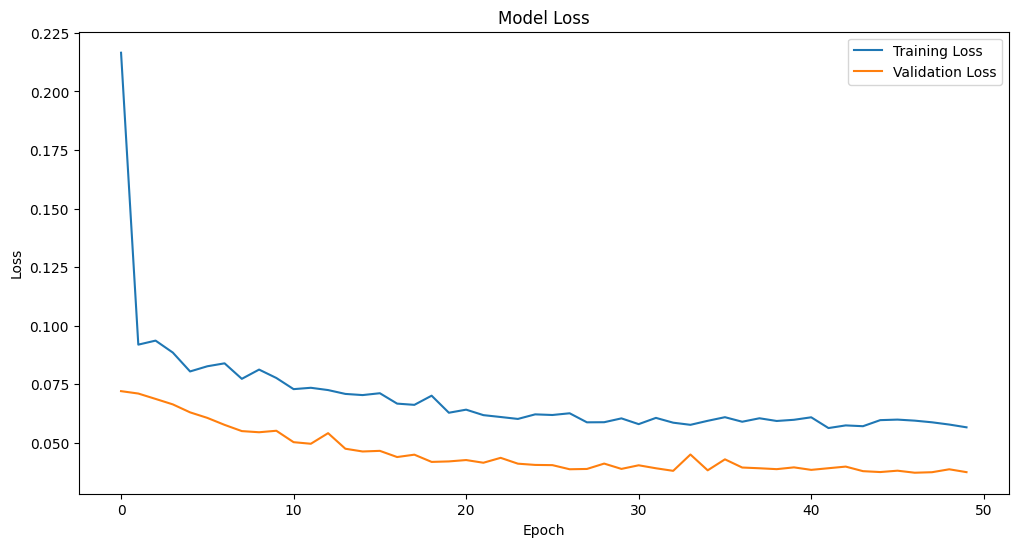

In [127]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Mean Squared Error: 0.0539
Root Mean Squared Error: 0.2322


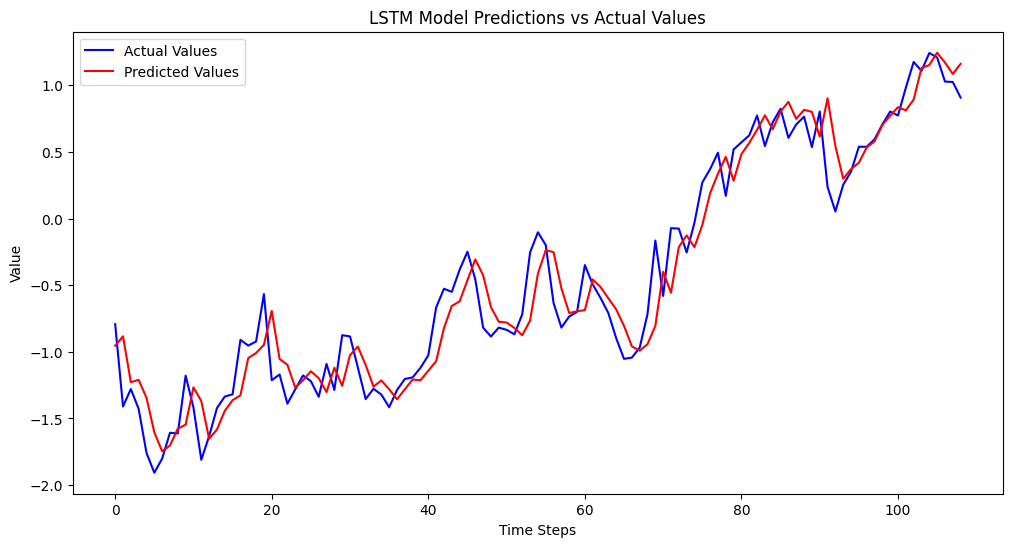

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have your model trained

# Make predictions
predictions = model.predict(X_test)  # Shape will be (n_samples, 1)

# Inverse transform the predictions
target_scaler = StandardScaler()  # Make sure to use the same scaler you used for y_train
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))  # Scale target variable
predictions_inv = target_scaler.inverse_transform(predictions)  # Inverse transform predictions
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform y_test

# Evaluate the model
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

# Visualize predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Values', color='blue')
plt.plot(predictions_inv, label='Predicted Values', color='red')
plt.title('LSTM Model Predictions vs Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


Random Forest Model Mean Squared Error: 0.06898336794602732
Random Forest Model Root Mean Squared Error: 0.26264685024958384


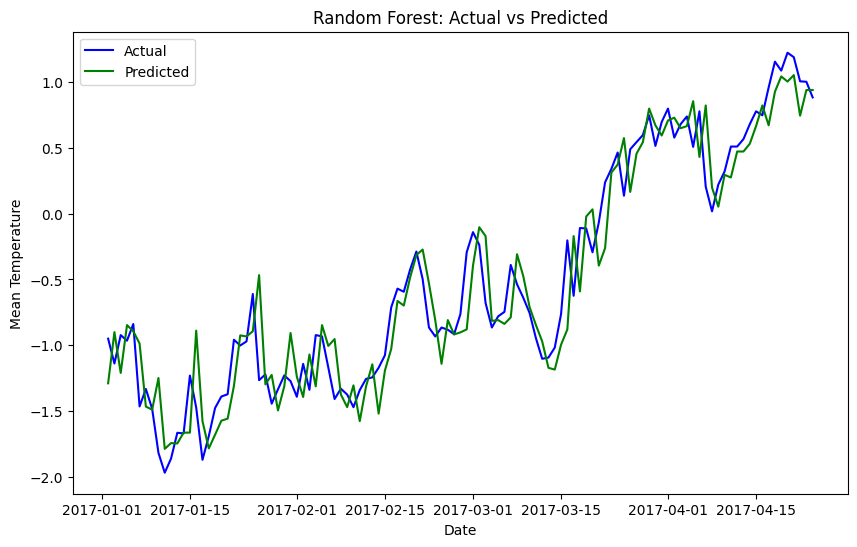

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are already defined

# Prepare lag features for train_data
train_data['lag1'] = train_data['meantemp'].shift(1)
train_data.dropna(inplace=True)  # Drop any rows with NaN values

# Prepare lag features for test_data (optional, if needed)
test_data['lag1'] = test_data['meantemp'].shift(1)
test_data.dropna(inplace=True)  # Drop any rows with NaN values

# Split the prepared train_data into features and target
X_train = train_data[['lag1']]  # Features for training
y_train = train_data['meantemp']  # Target for training

# Using the existing test_data directly for prediction
X_test = test_data[['lag1']]  # Features for testing
y_test = test_data['meantemp']  # Target for testing

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
predictions_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = mse_rf ** 0.5
print(f'Random Forest Model Mean Squared Error: {mse_rf}')
print(f'Random Forest Model Root Mean Squared Error: {rmse_rf}')

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, predictions_rf, label='Predicted', color='green')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

